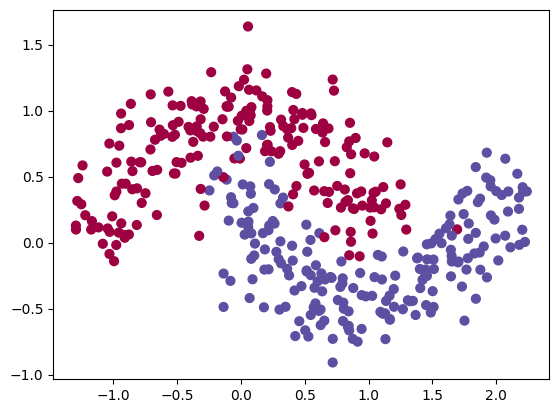

Cost after iteration 0: 0.692996
Cost after iteration 1000: 0.083459
Cost after iteration 2000: 0.075389
Cost after iteration 3000: 0.072353
Cost after iteration 4000: 0.071086
Cost after iteration 5000: 0.070418
Cost after iteration 6000: 0.069969
Cost after iteration 7000: 0.069636
Cost after iteration 8000: 0.069378
Cost after iteration 9000: 0.069172


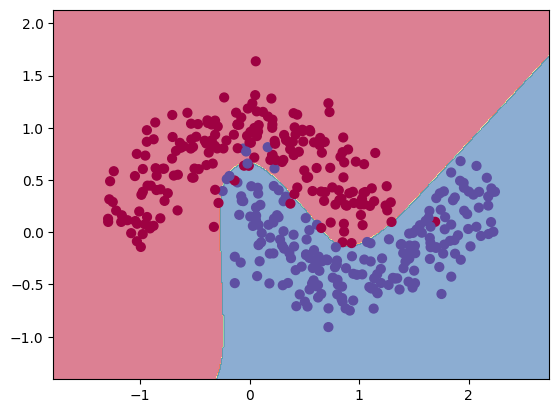

Training accuracy: 97.75%


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
np.random.seed(1)

# Choose one:
X, Y = make_moons(n_samples=400, noise=0.2)  # non-linearly separable
# X, Y = make_circles(n_samples=400, noise=0.2, factor=0.5)

X = X.T
Y = Y.reshape(1, Y.shape[0])
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral)
plt.show()


def layer_sizes(X, Y):
    n_x = X.shape[0]      # Number of input features
    n_h = 4               # Number of units in hidden layer
    # Number of output units (for binary classification = 1)
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)


def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01  # small random weights for layer 1
    b1 = np.zeros((n_h, 1))                # zero biases for layer 1
    W2 = np.random.randn(n_y, n_h) * 0.01  # small random weights for layer 2
    b2 = np.zeros((n_y, 1))                # zero biases for layer 2
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def forward_propagation(X, parameters):
    W1, b1 = parameters["W1"], parameters["b1"]
    W2, b2 = parameters["W2"], parameters["b2"]

    Z1 = np.dot(W1, X) + b1       # Linear step for hidden layer (z = Wx + b)
    # Activation: tanh non-linearity for hidden layer
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2      # Linear step for output layer
    A2 = sigmoid(Z2)              # Activation: sigmoid for output layer

    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache


def compute_cost(A2, Y):
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), 1 - Y)
    cost = -np.sum(logprobs) / m
    return float(np.squeeze(cost))


def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]

    # Error at output layer (prediction - truth)
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)          # Gradient wrt W2
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)  # Gradient wrt b2
    # Backprop through tanh activation
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T)                     # Gradient wrt W1
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)  # Gradient wrt b1

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads


def update_parameters(parameters, grads, learning_rate=1.2):
    parameters["W1"] -= learning_rate * grads["dW1"]
    parameters["b1"] -= learning_rate * grads["db1"]
    parameters["W2"] -= learning_rate * grads["dW2"]
    parameters["b2"] -= learning_rate * grads["db2"]
    return parameters


def nn_model(X, Y, n_h, num_iterations=10000, learning_rate=1.2, print_cost=False):
    n_x, _, n_y = layer_sizes(X, Y)
    parameters = initialize_parameters(n_x, n_h, n_y)
    for i in range(num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost and i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost:.6f}")
    return parameters


def predict(parameters, X):
    A2, _ = forward_propagation(X, parameters)
    predictions = (A2 > 0.5).astype(int)  # Threshold probabilities at 0.5
    return predictions


def plot_decision_boundary(pred_func, X, Y):
    x_min, x_max = X[0].min() - 0.5, X[0].max() + 0.5
    y_min, y_max = X[1].min() - 0.5, X[1].max() + 0.5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.6)
    plt.scatter(X[0], X[1], c=Y.ravel(), s=40, cmap=plt.cm.Spectral)
    plt.show()


parameters = nn_model(X, Y, n_h=4, num_iterations=10000, print_cost=True)

plot_decision_boundary(lambda x: predict(parameters, x), X, Y)

preds = predict(parameters, X)
accuracy = 100 * np.mean(preds == Y)
print(f"Training accuracy: {accuracy:.2f}%")